# 시작 

In [10]:
import cv2, os

file_list = [1,2, 78, 79, 80, 81, 82, 87, 88, 89]
list1=[]
list2 = []
last_list2=[]
qwer=0

In [11]:
import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import pandas as pd

In [12]:
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.3)
mp_drawing = mp.solutions.drawing_utils

# 폴더 만들기 

In [2]:
for f1 in range(1,17):
    for f2 in file_list:
        for i in range(1,6):
            if os.path.isfile(f"./AIhub_15/{f1}/{f2}/" + str(i) + ".mov"):   
                foldername = str(os.path.basename(f"./AIhub_15/{f1}/{f2}/"+ str(i) +".mov")).split('.')[0]
                try:
                    if not os.path.exists(f"./AIhub_15/{f1}/{f2}/" + foldername):
                        os.makedirs(f"./AIhub_15/{f1}/{f2}/" + foldername)
                except OSError:
                    print ('Error: Creating directory.')
    

# 프레임컷 나누기

In [13]:
# 파일경로 저장
for f1 in tqdm(range(1,15)):
    for f2 in range(1,10):
        for i in file_list:
            filepath = f'./RAZEN/{f1}/{f2}/' +str(i) + '.mov'

            # 영상 오픈
            video = cv2.VideoCapture(filepath)

            # 영상의 프레임 수, 너비, 높이, fps 출력해보기
            length = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
            width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
            height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
            fps = video.get(cv2.CAP_PROP_FPS)

            # 파일이름 저장할 변수
            count = 0

            while video.isOpened():

                ret, image = video.read()   

                if ret == False:
                    break
                # 프레임2당 1장씩 저장(fps값 바꾸면 개수 바뀜)
                if (int(video.get(1)) % 2 == 0):        
                    cv2.imwrite(f"./RAZEN/{f1}/{f2}/"+ str(i) +"/%d.jpg" % count, image)              
                    count += 1 
            video.release()
            list2=[]
            for num in range(0,int(length/2)) : 
                list1=[]
                sample_img = cv2.imread(f'./RAZEN/{f1}/{f2}/'+str(i)+f'/{num}.jpg')
                # BGR에서 RGB로 변환하면서 손에서 랜드마크 찾기위한 mediapipe library 함수임 
                results = hands.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))
                # 손 여러개일때 숫자 부여              
                if results.multi_hand_landmarks:                   
                    if len(results.multi_hand_landmarks) < 2 :
                        if str(results.multi_handedness[0].classification[0]).split('label: ')[1].rstrip() == '"Right"' :
                            
                            for idx in range(63):
                                list1.append(np.nan)            
                            for hand_no, hand_landmarks in enumerate(results.multi_hand_landmarks):               
                                for idx2 in range(63):    
                                    list1.append(f'{hand_landmarks.landmark[mp_hands.HandLandmark(idx2).value].x}')
                                    list1.append(f'{hand_landmarks.landmark[mp_hands.HandLandmark(idx2).value].y}')                                                      
                                    list1.append(f'{hand_landmarks.landmark[mp_hands.HandLandmark(idx2).value].z}') 
                        else :
                            for hand_no, hand_landmarks in enumerate(results.multi_hand_landmarks):     
                                for idx3 in range(63):                 
                                    list1.append(f'{hand_landmarks.landmark[mp_hands.HandLandmark(idx3).value].x}')
                                    list1.append(f'{hand_landmarks.landmark[mp_hands.HandLandmark(idx3).value].y}')   
                                    list1.append(f'{hand_landmarks.landmark[mp_hands.HandLandmark(idx2).value].z}') 
                            for idx in range(63):               
                                list1.append(np.nan)  
                    else :            
                        # 모든 랜드마크 반복   
                        for hand_no, hand_landmarks in enumerate(results.multi_hand_landmarks):
                            for idx4 in range(21):               
                                list1.append(f'{hand_landmarks.landmark[mp_hands.HandLandmark(idx4).value].x}')
                                list1.append(f'{hand_landmarks.landmark[mp_hands.HandLandmark(idx4).value].y}')
                                list1.append(f'{hand_landmarks.landmark[mp_hands.HandLandmark(idx2).value].z}') 
                    list2.append(list1)       
                else  :
                    for idx5 in range(63):
                        list1.append(np.nan)
                    for idx5 in range(63):
                        list1.append(np.nan)
                    list2.append(list1)               
                
                     
                image_height, image_width, _ = sample_img.shape
                
                # 원본 이미지에서 랜드마크찍을 사진을 만듬
                img_copy = sample_img.copy()             

                # 랜드마크 반복
                if results.multi_hand_landmarks:

                    for hand_no, hand_landmarks in enumerate(results.multi_hand_landmarks):
                        # 랜드마크 표시 바꾸려면 draw_landmarks 에 파라미터추가
                        # mp_drawing.DrawingSpec(color=(255,255,255), thickness=숫자, circle_radius=숫자)
                        # 이미지 위에 랜드마크 직는 함수
                        mp_drawing.draw_landmarks(image = img_copy, landmark_list = hand_landmarks,
                                                  connections = mp_hands.HAND_CONNECTIONS)

                    # 파일로 저장
                    cv2.imwrite(f"RAZEN/{f1}/{f2}/"+ str(i) +f"/{num}.jpg", img_copy)      
                    
            df = pd.DataFrame(list2)
            df = df.astype(dtype='float64', errors='ignore')
            df = df.interpolate()
            df = df.fillna(0)

            final_list1 = []
            final_list2 = []
            final_list3 = []
            last_list=pd.Series([])
            for final_idx in range(0,len(df)):
                final_list1.append(df.iloc[final_idx])                               
                last_list=pd.concat([last_list, df.iloc[final_idx]])
                
            last_list2.append(list(last_list))
            final_list2 = np.array(final_list1)
            final_list3 = final_list2.flatten()
            dfff = pd.DataFrame(final_list3)
            dfff = dfff.T
            dfff.to_csv(f'./RAZEN/{f1}/{f2}/'+str(i)+f'/{i}.csv', index=False, encoding="utf-8-sig")
            dfff2=np.array(dfff)
            np.save('./RAZEN_10_noz/'+str(qwer),dfff2[0])
            qwer=qwer+1


  0%|                                                                                           | 0/14 [00:00<?, ?it/s]C:\Users\smhrd\AppData\Local\Temp/ipykernel_4404/1151321525.py:95: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  last_list=pd.Series([])
100%|███████████████████████████████████████████████████████████████████████████████| 14/14 [1:12:13<00:00, 309.56s/it]


In [3]:
XXXX=[]
for index in range(1260):
    XXXX.append(np.load(f'./nnpy/{index}.npy'))
X=np.array(XXXX)

C:\Users\smhrd\AppData\Local\Temp/ipykernel_15204/10013507.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array(XXXX)


In [70]:
X.shape

(1260,)

In [73]:
X

array([array([3.83771986e-01, 8.23905170e-01, 5.68454332e-08, ...,
              6.17352128e-01, 9.74855185e-01, 1.89886079e-03])    ,
       array([3.83931428e-01, 8.29786777e-01, 1.10543247e-07, ...,
              5.99155724e-01, 9.47934031e-01, 1.11394804e-02])    ,
       array([ 3.46206754e-01,  9.04367387e-01, -1.65409944e-07, ...,
               5.76130450e-01,  9.68044221e-01,  1.19600426e-02])    ,
       ...,
       array([ 6.02517009e-01,  8.47058594e-01,  9.19398246e-08, ...,
               4.46395159e-01,  4.43126976e-01, -1.53866448e-02])    ,
       array([ 4.65300143e-01,  4.81984168e-01,  1.40625843e-07, ...,
               5.86452425e-01,  4.71110761e-01, -1.70753878e-02])    ,
       array([ 4.67591584e-01,  3.92157465e-01,  1.31651191e-07, ...,
               5.93628347e-01,  8.07232440e-01, -2.18406022e-02])    ],
      dtype=object)

In [76]:
len(X[0])

5544

In [248]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [248]:
y = []
for qq in range(126):
    for y_num in range(0,10):
        y.append(y_num)
for qq in range(126):
    for y_num in range(10,25):
        y.append(y_num)
for label_peple in range(16):
    for label_word in range(25,35):
        for label_angle in range(5):
            y.append(label_word)
for label_peple in range(16):
    for label_word in range(35,50):
        for label_angle in range(5):
            y.append(label_word)
for label_peple in range(16):
    for label_word in range(50,63):
        for label_angle in range(5):
            y.append(label_word)
for label_peple in range(16):
    for label_word in range(63,83):
        for label_angle in range(5):
            y.append(label_word)
for label_peple in range(16):
    for label_word in range(83,100):
        for label_angle in range(5):
            y.append(label_word)

In [249]:
y

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,


In [251]:
y = np.array(y)

In [227]:
from tensorflow.keras.utils import to_categorical

In [252]:
y = to_categorical(y)

In [253]:
len(y)

9150

In [254]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [255]:
y.shape

(9150, 100)

In [256]:
print(X.shape)
print(y.shape)

(9150,)
(9150, 100)


In [257]:
from sklearn.model_selection import train_test_split

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [259]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


7320
1830
7320
1830
(7320,)
(1830,)
(7320, 100)
(1830, 100)


In [121]:
X_train

array([array([ 3.84447753e-01,  8.10200989e-01, -3.87138108e-08, ...,
               5.45456171e-01,  8.49949837e-01,  3.83413956e-03])    ,
       array([ 5.64028323e-01,  7.58948028e-01,  1.24962298e-07, ...,
               5.10582507e-01,  8.39685678e-01, -1.37394452e-02])    ,
       array([6.35506570e-01, 8.11871290e-01, 8.84325146e-08, ...,
              6.35025144e-01, 9.03598189e-01, 2.25929357e-02])    , ...,
       array([6.06888413e-01, 7.48811722e-01, 1.04507578e-07, ...,
              5.89092374e-01, 8.29527080e-01, 1.95886623e-02])    ,
       array([5.99424481e-01, 7.98715591e-01, 7.26405531e-08, ...,
              4.05121535e-01, 8.94169629e-01, 2.32404862e-02])    ,
       array([ 4.40391660e-01,  8.83351564e-01, -1.26460122e-07, ...,
               6.26097620e-01,  9.65849698e-01, -2.33982340e-03])    ],
      dtype=object)

In [260]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [261]:
train_len=[len(aa) for aa in X]
train_len


[5544,
 4284,
 4914,
 4788,
 5544,
 4158,
 5166,
 4032,
 5292,
 4914,
 5544,
 4032,
 4410,
 4284,
 4284,
 3654,
 4032,
 4284,
 4032,
 4662,
 5418,
 4032,
 4410,
 4410,
 4536,
 4032,
 5040,
 5040,
 4914,
 4536,
 5544,
 4032,
 5040,
 5796,
 5292,
 4410,
 3906,
 4158,
 4032,
 4662,
 5796,
 4032,
 4788,
 4284,
 4284,
 4284,
 4662,
 3906,
 3528,
 4284,
 5796,
 4158,
 4914,
 5040,
 4284,
 5292,
 4284,
 4536,
 3780,
 4410,
 5796,
 4032,
 4410,
 4536,
 5544,
 4536,
 5292,
 5166,
 5544,
 4536,
 5922,
 4032,
 4536,
 4032,
 4536,
 4536,
 3528,
 3906,
 3780,
 4284,
 5670,
 4158,
 4914,
 4788,
 5544,
 4410,
 4536,
 5040,
 3654,
 4536,
 5922,
 3654,
 3780,
 4284,
 2520,
 4410,
 4158,
 4914,
 4284,
 5040,
 5922,
 3528,
 4284,
 5040,
 3024,
 4914,
 5040,
 5418,
 4536,
 6048,
 5922,
 3780,
 5040,
 4788,
 3150,
 4410,
 4914,
 4788,
 5166,
 5040,
 5922,
 4284,
 4284,
 5166,
 3780,
 4284,
 5544,
 4914,
 5166,
 4536,
 5544,
 4158,
 4158,
 4536,
 3402,
 4788,
 5418,
 5292,
 4662,
 5292,
 6300,
 4032,
 4914,

In [236]:
max_len = 0
tt = 0
train_len2 = []
for aa in X :
    train_len2.append(len(aa))
    if len(aa)==11592:
        max_len = tt
    tt +=1

In [237]:
max_len

6029

In [262]:
print('최대값 :', max(train_len))
print('최소값 :', min(train_len))
print('평균값 :', np.mean(train_len))
print('중앙값 :', np.median(train_len))

최대값 : 11592
최소값 : 630
평균값 : 4788.316721311476
중앙값 : 5040.0


In [263]:
X_train_pad=pad_sequences(X_train, maxlen=11592, dtype='float64')
X_test_pad=pad_sequences(X_test, maxlen=11592, dtype='float64')

In [264]:
X_train_pad.shape, X_test_pad.shape

((7320, 11592), (1830, 11592))

In [287]:
scaler = MinMaxScaler()
scaler.fit(X_train_pad)
trans_X= scaler.transform(X_train_pad)

hh = pd.DataFrame(trans_X)

In [288]:
hh

,0,1,2,3,4,5,6,7,8,9,...,6920,6921,6922,6923,6924,6925,6926,6927,6928,6929
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.677777,0.840088,0.961461,0.581757,0.842354,0.965272,0.548114,0.845212,0.966632,0.535482
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.100184,0.599171,0.525427,0.146513,0.596187,0.525040,0.223647,0.588695,0.523113,0.264364
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.600803,0.426910,0.858827,0.524746,0.438099,0.844517,0.503637,0.445654,0.829150,0.493460
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.108052,0.715366,0.667097,0.067098,0.715769,0.651507,0.059855,0.716284,0.637469,0.055710
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.288899,0.544691,0.278311,0.295414,0.541459,0.271980,0.323401,0.539008,0.267568,0.344766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.555289,0.000000,0.000000,0.495589,0.000000,0.000000,0.467595,0.000000,0.000000,0.453604
1004,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.510368,0.981592,0.920536,0.425421,0.979129,0.908356,0.422591,0.983497,0.890749,0.427791
1005,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.065815,0.605170,0.434274,0.109998,0.608112,0.434467,0.172558,0.604403,0.430791,0.208099
1006,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.480132,0.767417,0.620754,0.395708,0.766678,0.623145,0.359814,0.770358,0.625766,0.342418


In [289]:
scaler = MinMaxScaler()
scaler.fit(X_test_pad)
trans_X2= scaler.transform(X_test_pad)

hh2 = pd.DataFrame(trans_X2)
hh2

,0,1,2,3,4,5,6,7,8,9,...,6920,6921,6922,6923,6924,6925,6926,6927,6928,6929
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.631810,0.801123,0.934400,0.659118,0.798045,0.927492,0.676870,0.797516,0.916544,0.692141
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.725155,0.000000,0.000000,0.730541,0.000000,0.000000,0.707886,0.000000,0.000000,0.696072
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.598564,0.390474,0.431335,0.620662,0.399878,0.430567,0.653555,0.403763,0.436191,0.684044
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.403179,0.730276,0.347320,0.323824,0.724011,0.353312,0.326565,0.719343,0.358248,0.361104
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.725155,0.000000,0.000000,0.730541,0.000000,0.000000,0.707886,0.000000,0.000000,0.696072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.350301,0.557267,0.424646,0.389628,0.561016,0.426609,0.458044,0.562020,0.433883,0.514002
248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.771970,0.913169,0.953662,0.749554,0.912968,0.957793,0.734565,0.911465,0.958384,0.737777
249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.690922,0.937432,0.747220,0.676202,0.943295,0.743899,0.663287,0.946225,0.741938,0.663564
250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.841947,0.797550,0.891034,0.824690,0.797974,0.871362,0.818867,0.804977,0.852684,0.823170


In [405]:
X_train_pad_reshape=trans_X.reshape(1008, 6930, 1)
X_test_pad_reshape=trans_X2.reshape(252, 6930, 1)

In [265]:
X_train_pad_reshape=X_train_pad.reshape(7320, 92, 126)
X_test_pad_reshape=X_test_pad.reshape(1830, 92, 126)

In [266]:
X_train_pad_reshape.shape, X_test_pad_reshape.shape

((7320, 92, 126), (1830, 92, 126))

In [107]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, InputLayer
import tensorflow as tf
from keras import regularizers

In [423]:
model1 = Sequential()
model1.add(LSTM(128, return_sequences=True, input_shape=(6930,1)))
model1.add(LSTM(64, return_sequences=True))
model1.add(LSTM(32, return_sequences=False))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(10, activation='softmax'))

In [424]:
model1.compile(loss='categorical_crossentropy', optimizer = 'Adam', metrics=['acc'])

In [427]:
h = model1.fit(X_train_pad_reshape, y_train, validation_split=0.2, epochs=100, batch_size=16)

Epoch 1/100
51/51 [==============================] - 27s 480ms/step - loss: 2.3035 - acc: 0.1079 - val_loss: 2.3024 - val_acc: 0.0941
Epoch 2/100
51/51 [==============================] - 24s 466ms/step - loss: 2.2947 - acc: 0.1228 - val_loss: 2.2800 - val_acc: 0.1584
Epoch 3/100
51/51 [==============================] - 24s 467ms/step - loss: 2.3046 - acc: 0.1328 - val_loss: 2.3370 - val_acc: 0.0644
Epoch 4/100
51/51 [==============================] - 24s 467ms/step - loss: 2.3113 - acc: 0.1055 - val_loss: 2.3066 - val_acc: 0.1436
Epoch 5/100
51/51 [==============================] - 24s 473ms/step - loss: 2.3025 - acc: 0.1030 - val_loss: 2.2830 - val_acc: 0.1485
Epoch 6/100
51/51 [==============================] - 25s 495ms/step - loss: 2.2584 - acc: 0.1315 - val_loss: 2.2453 - val_acc: 0.1337
Epoch 7/100
51/51 [==============================] - 25s 499ms/step - loss: 2.2310 - acc: 0.1538 - val_loss: 2.2846 - val_acc: 0.1337
Epoch 8/100
51/51 [==============================] - 24s 479ms

KeyboardInterrupt: 

In [181]:
model1.evaluate(X_test_pad_reshape, y_test)

12/12 [==============================] - 3s 219ms/step - loss: 2.3169 - acc: 0.0926


[2.316904067993164, 0.09259258955717087]

In [32]:
model3 = Sequential()
model3.add(LSTM(512, return_sequences=True, input_shape=(6930,1)))
model3.add(LSTM(256, return_sequences=True))
model3.add(LSTM(128, return_sequences=False))
model3.add(Dense(10, activation='softmax'))

In [33]:
model3.compile(loss='categorical_crossentropy', optimizer = 'Adam', metrics=['acc'])

In [34]:
h3 = model3.fit(X_train_pad_reshape, y_train, validation_split=0.2, epochs=50, batch_size=16)

Epoch 1/50
51/51 [==============================] - 39s 728ms/step - loss: 2.3417 - acc: 0.1191 - val_loss: 2.2994 - val_acc: 0.0842
Epoch 2/50
51/51 [==============================] - 37s 725ms/step - loss: 2.2760 - acc: 0.1216 - val_loss: 2.2465 - val_acc: 0.1287
Epoch 3/50
51/51 [==============================] - 37s 726ms/step - loss: 2.2683 - acc: 0.1216 - val_loss: 2.2391 - val_acc: 0.1386
Epoch 4/50
51/51 [==============================] - 37s 726ms/step - loss: 2.2781 - acc: 0.1600 - val_loss: 2.2191 - val_acc: 0.1980
Epoch 5/50
51/51 [==============================] - 37s 726ms/step - loss: 2.3498 - acc: 0.1104 - val_loss: 2.5303 - val_acc: 0.0594
Epoch 6/50
51/51 [==============================] - 37s 730ms/step - loss: 2.3757 - acc: 0.1154 - val_loss: 2.3150 - val_acc: 0.0792
Epoch 7/50
51/51 [==============================] - 37s 729ms/step - loss: 2.3195 - acc: 0.1042 - val_loss: 2.3134 - val_acc: 0.0842
Epoch 8/50
51/51 [==============================] - 37s 735ms/step - 

In [36]:
model3.evaluate(X_test_pad_reshape, y_test)

8/8 [==============================] - 3s 350ms/step - loss: 2.3198 - acc: 0.0675


[2.3198421001434326, 0.0674603208899498]

In [439]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

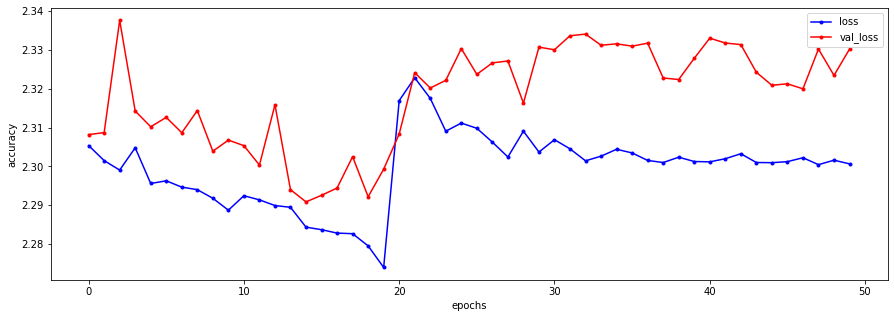

In [414]:
plt.figure(figsize=(15,5))

# train 데이터
plt.plot(h.history['loss'],
         label='loss',
         c = 'blue',
         marker='.'
         )

# val 데이터
plt.plot(h.history['val_loss'],
         label='val_loss',
         c = 'red',
         marker='.'
         )

plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.legend()
plt.show()

In [338]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [415]:
pre = model2.predict(X_test_pad_reshape)
pre

8/8 [==============================] - 2s 140ms/step


array([[1.59346893e-01, 1.31978884e-01, 1.05233274e-01, ...,
        8.64882544e-02, 1.10305719e-01, 5.75567707e-02],
       [2.82117653e-05, 2.22547951e-05, 1.23659432e-01, ...,
        2.39691362e-01, 2.29607266e-03, 1.10424049e-02],
       [3.23804840e-03, 3.61526641e-03, 1.46624893e-01, ...,
        1.32604256e-01, 6.36282563e-02, 1.86406314e-01],
       ...,
       [1.60407260e-01, 1.32948190e-01, 1.03511222e-01, ...,
        8.66504684e-02, 1.10061646e-01, 5.65615371e-02],
       [1.60011992e-01, 1.32584199e-01, 1.04200959e-01, ...,
        8.65736231e-02, 1.10164478e-01, 5.69230542e-02],
       [7.09465006e-03, 7.70251313e-03, 1.39729559e-01, ...,
        1.28678396e-01, 7.62708336e-02, 1.76392108e-01]], dtype=float32)

In [417]:
np.argmax(pre, axis=1)

array([0, 6, 9, 9, 6, 0, 0, 0, 0, 0, 9, 0, 9, 0, 0, 9, 0, 0, 0, 0, 9, 6,
       0, 0, 0, 0, 0, 9, 0, 9, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 9, 0, 0,
       9, 0, 9, 2, 0, 0, 2, 0, 9, 0, 0, 0, 0, 9, 0, 0, 0, 5, 9, 9, 6, 0,
       9, 0, 9, 0, 0, 0, 9, 0, 0, 0, 0, 6, 0, 0, 6, 0, 0, 3, 3, 0, 0, 9,
       3, 6, 0, 6, 9, 0, 2, 0, 9, 0, 0, 0, 0, 9, 9, 9, 0, 0, 0, 0, 5, 0,
       0, 6, 0, 0, 9, 0, 0, 9, 0, 0, 0, 0, 0, 6, 9, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 5, 6, 9, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 9, 0, 6, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 9,
       0, 0, 3, 0, 3, 0, 0, 9, 6, 0, 3, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 9, 0, 0, 3, 6, 0, 0, 0, 6,
       6, 9, 0, 6, 0, 0, 0, 9, 0, 0, 0, 6, 9, 0, 0, 9, 0, 0, 0, 0, 0, 0,
       9, 0, 0, 9, 6, 9, 0, 0, 0, 9], dtype=int64)

In [422]:
print(confusion_matrix(rounded_labels, np.argmax(pre, axis=1)))

[[22  0  0  0  0  0  0  0  0  0]
 [30  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  4  0  0  6]
 [17  0  0  4  0  0  2  0  0  4]
 [17  0  2  2  0  1  7  0  0  1]
 [18  0  1  0  0  0  0  0  0  7]
 [ 7  0  2  0  0  1  3  0  0  4]
 [11  0  1  3  0  0  3  0  0  1]
 [23  0  0  0  0  1  0  0  0 12]
 [ 9  0  0  0  0  0  0  0  0  9]]


In [421]:
y_test[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [420]:
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels

array([5, 4, 2, 8, 6, 8, 7, 1, 4, 1, 9, 7, 6, 1, 4, 9, 8, 1, 5, 7, 9, 4,
       1, 2, 0, 1, 3, 8, 3, 9, 1, 5, 7, 5, 4, 5, 6, 0, 1, 8, 9, 5, 3, 4,
       9, 1, 9, 4, 1, 9, 7, 0, 8, 5, 4, 3, 4, 8, 9, 2, 2, 4, 6, 3, 2, 4,
       8, 8, 5, 1, 6, 4, 6, 4, 2, 3, 0, 6, 8, 0, 4, 0, 9, 3, 7, 1, 0, 9,
       7, 6, 8, 3, 5, 5, 6, 4, 2, 6, 9, 1, 7, 5, 8, 2, 5, 8, 3, 1, 6, 5,
       4, 2, 3, 2, 3, 8, 1, 4, 3, 0, 2, 8, 3, 4, 8, 7, 2, 3, 8, 2, 4, 0,
       8, 1, 7, 3, 4, 1, 2, 5, 7, 8, 5, 8, 4, 8, 3, 8, 1, 3, 9, 0, 0, 0,
       6, 2, 8, 2, 3, 5, 2, 0, 1, 1, 9, 7, 8, 4, 5, 3, 6, 0, 3, 2, 9, 6,
       5, 4, 3, 5, 7, 5, 2, 7, 7, 1, 3, 4, 5, 3, 6, 1, 0, 0, 5, 9, 6, 3,
       3, 2, 7, 5, 9, 8, 4, 8, 1, 4, 5, 2, 1, 8, 8, 8, 4, 4, 6, 8, 2, 2,
       7, 2, 2, 3, 8, 1, 0, 8, 1, 5, 1, 4, 3, 7, 1, 8, 0, 1, 0, 2, 0, 0,
       8, 0, 8, 9, 7, 5, 1, 8, 4, 2], dtype=int64)

In [55]:
model5 = Sequential()
model5.add(LSTM(256, return_sequences=True, activation = 'relu', input_shape=(6930,1)))
model5.add(LSTM(128, return_sequences=True, activation = 'relu'))
model5.add(LSTM(64, return_sequences=False, activation = 'relu'))
model5.add(Dense(10, activation='softmax'))

In [51]:
model5.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [52]:
h5 = model5.fit(X_train_pad_reshape, y_train, validation_split=0.2, epochs=100, batch_size=16)

Epoch 1/100
 1/51 [..............................] - ETA: 39:04 - loss: 2.3023 - categorical_accuracy: 0.1250

KeyboardInterrupt: 

In [267]:
print(X_train_pad_reshape.shape)
print(X_test_pad_reshape.shape)
print(y_train.shape)
print(y_test.shape)


(7320, 92, 126)
(1830, 92, 126)
(7320, 100)
(1830, 100)


In [268]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, InputLayer, RepeatVector, Dropout
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from keras import regularizers

In [269]:
TIME_STEPS = 92 #frame 길이 넣어 주세요
DIMENSION = 126 #좌표갯수 넣어주세요
model0 = Sequential()
model0.add(InputLayer(input_shape=(TIME_STEPS, DIMENSION )))

model0.add(
        LSTM(
            128,
            return_sequences=True,
            kernel_regularizer=regularizers.l2(l2=0.0001),
#            activation="relu",
            input_shape=(TIME_STEPS, DIMENSION)
        )
    )

model0.add(Dropout(0.5))
model0.add(
        LSTM(
            64,
            return_sequences=False,
            kernel_regularizer=regularizers.l2(l2=0.0001)
#             activation="relu",
        )
    )
model0.add(Dropout(0.5))
model0.add(Dense(100, activation="softmax"))

In [270]:
model0.compile(loss='categorical_crossentropy', optimizer = 'Adam', metrics=['acc'])

In [271]:
h0 = model0.fit(X_train_pad_reshape, y_train, validation_split=0.2, epochs=300, batch_size=16)

Epoch 1/300
366/366 [==============================] - 7s 12ms/step - loss: 4.4522 - acc: 0.0222 - val_loss: 4.1129 - val_acc: 0.0403
Epoch 2/300
366/366 [==============================] - 3s 9ms/step - loss: 4.0160 - acc: 0.0557 - val_loss: 3.6116 - val_acc: 0.0943
Epoch 3/300
366/366 [==============================] - 3s 9ms/step - loss: 3.5850 - acc: 0.0891 - val_loss: 3.3035 - val_acc: 0.1093
Epoch 4/300
366/366 [==============================] - 3s 9ms/step - loss: 3.3554 - acc: 0.1148 - val_loss: 3.1437 - val_acc: 0.1202
Epoch 5/300
366/366 [==============================] - 3s 9ms/step - loss: 3.2024 - acc: 0.1375 - val_loss: 3.0094 - val_acc: 0.1680
Epoch 6/300
366/366 [==============================] - 3s 9ms/step - loss: 3.0236 - acc: 0.1586 - val_loss: 2.8523 - val_acc: 0.2001
Epoch 7/300
366/366 [==============================] - 3s 9ms/step - loss: 2.9300 - acc: 0.1796 - val_loss: 2.7062 - val_acc: 0.2240
Epoch 8/300
366/366 [==============================] - 3s 9ms/step -

366/366 [==============================] - 3s 9ms/step - loss: 0.6320 - acc: 0.8086 - val_loss: 0.8260 - val_acc: 0.7609
Epoch 124/300
366/366 [==============================] - 3s 9ms/step - loss: 0.6886 - acc: 0.8009 - val_loss: 0.9139 - val_acc: 0.7514
Epoch 125/300
366/366 [==============================] - 3s 9ms/step - loss: 0.6312 - acc: 0.8118 - val_loss: 0.9354 - val_acc: 0.7445
Epoch 126/300
366/366 [==============================] - 3s 9ms/step - loss: 0.6674 - acc: 0.8128 - val_loss: 0.8537 - val_acc: 0.7630
Epoch 127/300
366/366 [==============================] - 3s 9ms/step - loss: 0.7004 - acc: 0.7942 - val_loss: 0.8520 - val_acc: 0.7541
Epoch 128/300
366/366 [==============================] - 3s 9ms/step - loss: 0.6195 - acc: 0.8168 - val_loss: 0.8897 - val_acc: 0.7555
Epoch 129/300
366/366 [==============================] - 3s 9ms/step - loss: 0.6526 - acc: 0.8108 - val_loss: 0.9253 - val_acc: 0.7391
Epoch 130/300
366/366 [==============================] - 3s 9ms/step 

Epoch 184/300
366/366 [==============================] - 3s 9ms/step - loss: 0.4909 - acc: 0.8649 - val_loss: 0.8107 - val_acc: 0.7855
Epoch 185/300
366/366 [==============================] - 3s 9ms/step - loss: 0.4972 - acc: 0.8700 - val_loss: 0.9080 - val_acc: 0.7760
Epoch 186/300
366/366 [==============================] - 3s 9ms/step - loss: 0.4880 - acc: 0.8692 - val_loss: 0.9116 - val_acc: 0.7828
Epoch 187/300
366/366 [==============================] - 3s 9ms/step - loss: 0.5278 - acc: 0.8576 - val_loss: 0.8188 - val_acc: 0.7985
Epoch 188/300
366/366 [==============================] - 3s 9ms/step - loss: 0.4610 - acc: 0.8794 - val_loss: 0.8461 - val_acc: 0.7978
Epoch 189/300
366/366 [==============================] - 3s 9ms/step - loss: 0.4921 - acc: 0.8726 - val_loss: 0.7650 - val_acc: 0.8026
Epoch 190/300
366/366 [==============================] - 3s 9ms/step - loss: 0.4737 - acc: 0.8706 - val_loss: 0.8221 - val_acc: 0.7958
Epoch 191/300
366/366 [==============================] 

### 100개

In [275]:
model0.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 92, 128)           130560    
                                                                 
 dropout_14 (Dropout)        (None, 92, 128)           0         
                                                                 
 lstm_15 (LSTM)              (None, 64)                49408     
                                                                 
 dropout_15 (Dropout)        (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 100)               6500      
                                                                 
Total params: 186,468
Trainable params: 186,468
Non-trainable params: 0
_________________________________________________________________


### 모델저장

In [277]:
model0.save("LSTM_Model.h5")

### 모델불러오기

In [278]:
from tensorflow.keras.models import load_model
modell = load_model("LSTM_Model.h5")

In [279]:
modell.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 92, 128)           130560    
                                                                 
 dropout_14 (Dropout)        (None, 92, 128)           0         
                                                                 
 lstm_15 (LSTM)              (None, 64)                49408     
                                                                 
 dropout_15 (Dropout)        (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 100)               6500      
                                                                 
Total params: 186,468
Trainable params: 186,468
Non-trainable params: 0
_________________________________________________________________


In [272]:
model0.evaluate(X_test_pad_reshape, y_test)

58/58 [==============================] - 1s 13ms/step - loss: 0.9282 - acc: 0.8038


[0.9282408952713013, 0.8038251399993896]

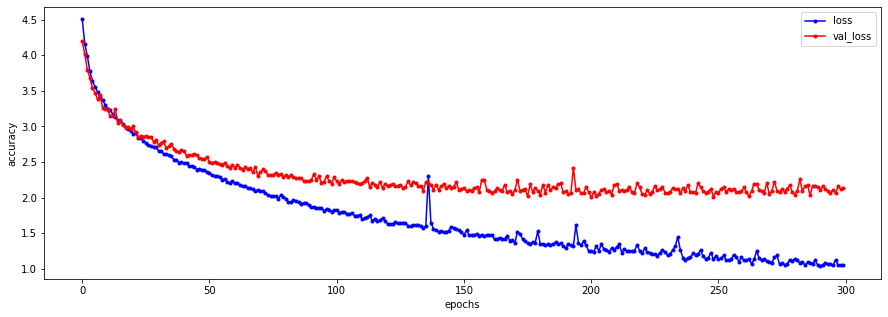

In [144]:
plt.figure(figsize=(15,5))

# train 데이터
plt.plot(h0.history['loss'],
         label='loss',
         c = 'blue',
         marker='.'
         )

# val 데이터
plt.plot(h0.history['val_loss'],
         label='val_loss',
         c = 'red',
         marker='.'
         )

plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.legend()
plt.show()

In [454]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [456]:
pre = model0.predict(X_test_pad_reshape)
pre

58/58 [==============================] - 1s 8ms/step


array([[9.96872362e-09, 3.68345909e-10, 6.27462793e-09, ...,
        9.05010233e-10, 2.52025734e-09, 1.87018312e-09],
       [7.90850606e-07, 2.18802688e-05, 4.95572388e-01, ...,
        1.54024815e-06, 1.18005642e-06, 2.60919364e-06],
       [7.44134754e-10, 5.52795214e-08, 1.07958655e-07, ...,
        9.88830268e-01, 2.76815171e-09, 2.04049977e-09],
       ...,
       [6.04488404e-10, 2.94107565e-08, 8.40458120e-11, ...,
        1.05354753e-10, 2.12114171e-09, 2.15520143e-10],
       [1.11506060e-09, 3.42190901e-06, 2.08973905e-08, ...,
        2.60917593e-10, 1.41159390e-10, 1.41576707e-11],
       [6.01355499e-09, 4.08201686e-06, 4.15946573e-07, ...,
        8.88013274e-10, 6.63611885e-08, 2.26132961e-08]], dtype=float32)

In [457]:
np.argmax(pre, axis=1)

array([24,  7, 97, ...,  9,  8,  4], dtype=int64)

In [460]:
confusion_matrix(rounded_labels, np.argmax(pre, axis=1))

array([[15,  0,  0, ...,  0,  0,  0],
       [ 0, 28,  0, ...,  0,  0,  0],
       [ 0,  0, 14, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 13,  0,  0],
       [ 0,  0,  0, ...,  0, 17,  0],
       [ 0,  0,  0, ...,  0,  0, 13]], dtype=int64)

In [458]:
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels

array([24,  7, 97, ...,  9,  8,  3], dtype=int64)

In [461]:
# 혼동 행렬 생성 함수 -> confusion matrix부분
def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(10, 8))
    # 직사각형 데이터를 색을 넣어서 표현하는 함수
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        # precision    recall  f1-score   support 나오는 함수
        print(classification_report(y_true, y_pred))

In [464]:
import seaborn as sns

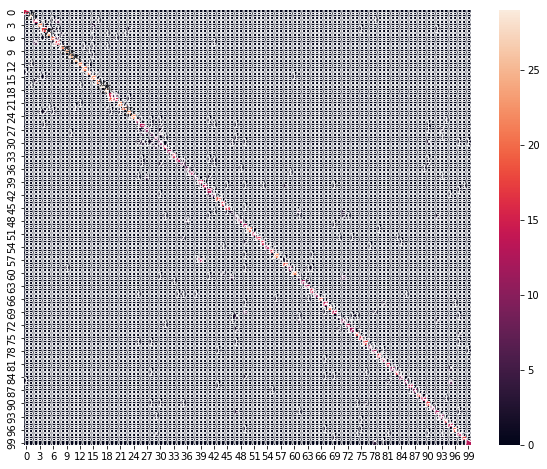

Classification Report
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       0.93      1.00      0.97        28
           2       0.67      0.61      0.64        23
           3       0.84      0.81      0.82        26
           4       0.74      0.65      0.69        26
           5       0.92      0.85      0.88        27
           6       0.76      0.68      0.72        28
           7       0.57      0.67      0.62        24
           8       0.91      0.88      0.89        24
           9       0.96      0.96      0.96        26
          10       0.96      0.96      0.96        26
          11       0.96      1.00      0.98        25
          12       0.91      0.91      0.91        23
          13       0.95      0.95      0.95        22
          14       0.87      0.95      0.91        21
          15       0.76      0.88      0.81        25
          16       0.95      0.91      0.93        22
     

In [465]:
print_confusion_matrix(rounded_labels, np.argmax(pre, axis=1))

### 라젠 25개

In [59]:
model0.evaluate(X_test_pad_reshape, y_test)

20/20 [==============================] - 0s 15ms/step - loss: 0.8183 - acc: 0.8254


[0.8183159828186035, 0.8253968358039856]

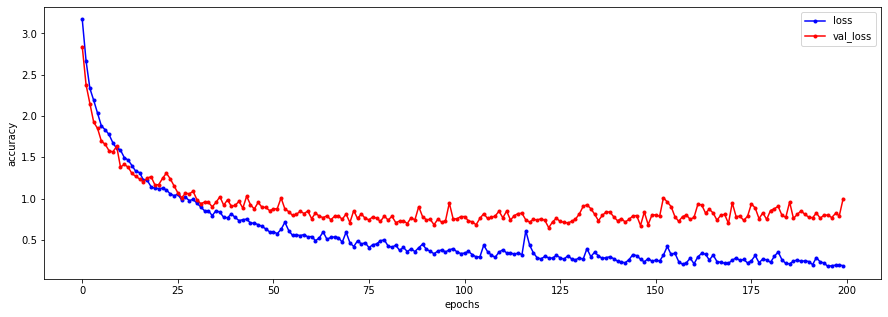

In [60]:
plt.figure(figsize=(15,5))

# train 데이터
plt.plot(h0.history['loss'],
         label='loss',
         c = 'blue',
         marker='.'
         )

# val 데이터
plt.plot(h0.history['val_loss'],
         label='val_loss',
         c = 'red',
         marker='.'
         )

plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.legend()
plt.show()

In [ ]:
# 영상 오픈
video = cv2.VideoCapture(0)

# 영상의 프레임 수, 너비, 높이, fps 출력해보기
length = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = video.get(cv2.CAP_PROP_FPS)

            # 파일이름 저장할 변수
count = 0

while video.isOpened():
    ret, image = video.read()   
        if ret == False:
                break
        # 프레임2당 1장씩 저장(fps값 바꾸면 개수 바뀜)
        if (int(video.get(1)) % 2 == 0):        
            cv2.imwrite(f"./RAZEN/{f1}/{f2}/"+ str(i) +"/%d.jpg" % count, image)              
            count += 1 
        video.release()
        list2=[]
        for num in range(0,int(length/2)) : 
            list1=[]
            sample_img = cv2.imread(f'./RAZEN/{f1}/{f2}/'+str(i)+f'/{num}.jpg')
                # BGR에서 RGB로 변환하면서 손에서 랜드마크 찾기위한 mediapipe library 함수임 
            results = hands.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))
                # 손 여러개일때 숫자 부여              
            if results.multi_hand_landmarks:                   
                if len(results.multi_hand_landmarks) < 2 :
                    if str(results.multi_handedness[0].classification[0]).split('label: ')[1].rstrip() == '"Right"' :
                            
                        for idx in range(63):
                            list1.append(np.nan)            
                        for hand_no, hand_landmarks in enumerate(results.multi_hand_landmarks):               
                            for idx2 in range(21):    
                                list1.append(f'{hand_landmarks.landmark[mp_hands.HandLandmark(idx2).value].x}')
                                list1.append(f'{hand_landmarks.landmark[mp_hands.HandLandmark(idx2).value].y}')
                                list1.append(f'{hand_landmarks.landmark[mp_hands.HandLandmark(idx2).value].z}')                    
                    else :
                        for hand_no, hand_landmarks in enumerate(results.multi_hand_landmarks):         
                                
                            for idx3 in range(21):                 
                                list1.append(f'{hand_landmarks.landmark[mp_hands.HandLandmark(idx3).value].x}')
                                list1.append(f'{hand_landmarks.landmark[mp_hands.HandLandmark(idx3).value].y}')
                                list1.append(f'{hand_landmarks.landmark[mp_hands.HandLandmark(idx3).value].z}')                  
                        for idx in range(63):               
                            list1.append(np.nan)  
                else :            
                        # 모든 랜드마크 반복   
                    for hand_no, hand_landmarks in enumerate(results.multi_hand_landmarks):
                        for idx4 in range(21):               
                            list1.append(f'{hand_landmarks.landmark[mp_hands.HandLandmark(idx4).value].x}')
                            list1.append(f'{hand_landmarks.landmark[mp_hands.HandLandmark(idx4).value].y}')
                            list1.append(f'{hand_landmarks.landmark[mp_hands.HandLandmark(idx4).value].z}')
                list2.append(list1)       
            else  :
                for idx5 in range(63):
                    list1.append(np.nan)
                for idx5 in range(63):
                    list1.append(np.nan)
                list2.append(list1)               
                
                     
            image_height, image_width, _ = sample_img.shape
                
                # 원본 이미지에서 랜드마크찍을 사진을 만듬
            img_copy = sample_img.copy()             

                # 랜드마크 반복
            if results.multi_hand_landmarks:

                for hand_no, hand_landmarks in enumerate(results.multi_hand_landmarks):
                        # 랜드마크 표시 바꾸려면 draw_landmarks 에 파라미터추가
                        # mp_drawing.DrawingSpec(color=(255,255,255), thickness=숫자, circle_radius=숫자)
                        # 이미지 위에 랜드마크 직는 함수
                    mp_drawing.draw_landmarks(image = img_copy, landmark_list = hand_landmarks,
                                                  connections = mp_hands.HAND_CONNECTIONS)

                    # 파일로 저장
                cv2.imwrite(f"RAZEN/{f1}/{f2}/"+ str(i) +f"/{num}.jpg", img_copy)      
                    
df = pd.DataFrame(list2)
df = df.astype(dtype='float64', errors='ignore')
df = df.interpolate()
df = df.fillna(0)

final_list1 = []
final_list2 = []
final_list3 = []
last_list=pd.Series([])
for final_idx in range(0,len(df)):
    final_list1.append(df.iloc[final_idx])                               
    last_list=pd.concat([last_list, df.iloc[final_idx]])
                
last_list2.append(list(last_list))
final_list2 = np.array(final_list1)
final_list3 = final_list2.flatten()
dfff = pd.DataFrame(final_list3)
dfff = dfff.T
dfff.to_csv(f'./RAZEN/{f1}/{f2}/'+str(i)+f'/{i}.csv', index=False, encoding="utf-8-sig")
dfff2=np.array(dfff)
np.save('./nnpy/'+str(qwer),dfff2[0])
qwer=qwer+1

In [330]:
list1 = []
list2 = []

In [280]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

In [415]:
cap = cv2.VideoCapture(0)
if (int(cap.get(1)) % 2 == 0):         
    list2=[]
    with mp_hands.Hands(max_num_hands = 2, min_detection_confidence=0.5, min_tracking_confidence=0.5) as hands: 
        while cap.isOpened():
            list1=[]
            ret, frame = cap.read()        
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)        
            image = cv2.flip(image, 1)      
            image.flags.writeable = False        
            results = hands.process(image)        
            image.flags.writeable = True        
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)        
            if results.multi_hand_landmarks:                   
                if len(results.multi_hand_landmarks) < 2 :
                    if str(results.multi_handedness[0].classification[0]).split('label: ')[1].rstrip() == '"Right"' :

                        for idx in range(63):
                            list1.append(np.nan)            
                        for hand_no, hand_landmarks in enumerate(results.multi_hand_landmarks):               
                            for idx2 in range(21):    
                                list1.append(f'{hand_landmarks.landmark[mp_hands.HandLandmark(idx2).value].x}')
                                list1.append(f'{hand_landmarks.landmark[mp_hands.HandLandmark(idx2).value].y}')
                                list1.append(f'{hand_landmarks.landmark[mp_hands.HandLandmark(idx2).value].z}')                    
                    else :
                        for hand_no, hand_landmarks in enumerate(results.multi_hand_landmarks):         

                            for idx3 in range(21):                 
                                list1.append(f'{hand_landmarks.landmark[mp_hands.HandLandmark(idx3).value].x}')
                                list1.append(f'{hand_landmarks.landmark[mp_hands.HandLandmark(idx3).value].y}')
                                list1.append(f'{hand_landmarks.landmark[mp_hands.HandLandmark(idx3).value].z}')                  
                        for idx in range(63):               
                            list1.append(np.nan)  
                else :            
                            # 모든 랜드마크 반복   
                    for hand_no, hand_landmarks in enumerate(results.multi_hand_landmarks):
                        for idx4 in range(21):               
                            list1.append(f'{hand_landmarks.landmark[mp_hands.HandLandmark(idx4).value].x}')
                            list1.append(f'{hand_landmarks.landmark[mp_hands.HandLandmark(idx4).value].y}')
                            list1.append(f'{hand_landmarks.landmark[mp_hands.HandLandmark(idx4).value].z}')
                list2.append(list1)       
            else  :
                for idx5 in range(63):
                    list1.append(np.nan)
                for idx5 in range(63):
                    list1.append(np.nan)
                list2.append(list1)       


            if results.multi_hand_landmarks:
                for num, hand in enumerate(results.multi_hand_landmarks):
                    mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS)   
# 손이 잡히면 시작
# 손이 밖으로 나가면 끊어버리기
            if len(list2) == 50:
                print(list2)
                break

            cv2.imshow('Hand Tracking', image)
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
    cap.release()
    cv2.destroyAllWindows()

[[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], ['0.22494828701019287', '0.7803516387939453', '-5.7246285933842955e-08', '0.23689958453178406', '0.8017686009407043', '-0.005484587047249079', '0.24114075303077698', '0.8331469893455505', '-0.007089084014296532', '0.24215629696846008', '0.8603289127349854', '-0.008401080965995789', '0.24329181015491486', '0.8820090293884277', '-0.008606642484664917', '0.21752291917

In [400]:
str(results.multi_handedness[0].classification[0]).split('label: ')[1].rstrip()

TypeError: 'NoneType' object is not subscriptable

In [416]:

for s in list2:
    print(len(s))



126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126
126


In [417]:
df = pd.DataFrame(list2)
df = df.astype(dtype='float64', errors='ignore')
df = df.interpolate()
df = df.fillna(0)

            
# last_list=pd.Series([])
# for final_idx in range(0,len(df)):
#     final_list1.append(df.iloc[final_idx])                               
#     last_list=pd.concat([last_list, df.iloc[final_idx]])
                
# last_list2.append(list(last_list))
# final_list2 = np.array(final_list1)
# final_list3 = final_list2.flatten()
# dfff = pd.DataFrame(final_list3)
# dfff = dfff.T
# dfff.to_csv(f'./RAZEN/{f1}/{f2}/'+str(i)+f'/{i}.csv', index=False, encoding="utf-8-sig")
# dfff2=np.array(dfff)
# np.save('./nnpy/'+str(qwer),dfff2[0])
# qwer=qwer+1


In [418]:
df


,0,1,2,3,4,5,6,7,8,9,...,116,117,118,119,120,121,122,123,124,125
0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.224948,0.780352,-5.724629e-08,0.236900,0.801769,-0.005485,0.241141,0.833147,-0.007089,0.242156,...,0.003190,0.496883,0.929045,0.001031,0.488643,0.945604,0.001005,0.480788,0.956927,0.002024
2,0.217550,0.792331,-2.168746e-08,0.238765,0.810243,-0.011296,0.245157,0.841671,-0.014093,0.245761,...,0.010310,0.501659,0.934373,0.009184,0.494119,0.950816,0.009433,0.486362,0.963036,0.010535
3,0.219233,0.791825,-4.677979e-08,0.240113,0.811270,-0.007987,0.245791,0.842728,-0.009459,0.246348,...,0.006967,0.502050,0.934178,0.005140,0.493776,0.950392,0.005181,0.485722,0.961964,0.006095
4,0.223680,0.795449,-4.562823e-08,0.241526,0.815872,-0.008703,0.245994,0.846246,-0.011583,0.246708,...,0.005512,0.501201,0.936802,0.002655,0.491868,0.950413,0.002256,0.483000,0.959265,0.003062
5,0.219938,0.791713,-7.542743e-08,0.240926,0.809790,-0.010634,0.246978,0.840350,-0.014087,0.247481,...,0.006210,0.500595,0.935831,0.004026,0.491666,0.949723,0.003993,0.483036,0.958919,0.004920
6,0.219415,0.785905,-6.181045e-08,0.240187,0.805477,-0.011294,0.245461,0.835820,-0.014743,0.245991,...,0.005049,0.500602,0.928110,0.002752,0.491062,0.940234,0.002553,0.482413,0.947586,0.003482
7,0.220216,0.784403,-5.976261e-08,0.240851,0.805395,-0.008884,0.245581,0.835082,-0.012453,0.245794,...,0.007322,0.502385,0.926008,0.005437,0.493765,0.937580,0.005099,0.485694,0.944913,0.005722
8,0.221089,0.784808,-7.098348e-08,0.241533,0.805104,-0.009563,0.246169,0.835613,-0.013591,0.245796,...,0.006845,0.500950,0.928760,0.004491,0.491936,0.940943,0.003944,0.483309,0.948751,0.004526
9,0.221363,0.784176,-7.481378e-08,0.241795,0.804899,-0.008891,0.246391,0.835131,-0.012865,0.246033,...,0.008100,0.500735,0.928297,0.006110,0.491837,0.940346,0.005628,0.483332,0.948179,0.006172


In [424]:
last_list2=[]

In [425]:
final_list1 = []
final_list2 = []
final_list3 = []
last_list=pd.Series([])
for final_idx in range(0,len(df)):
    final_list1.append(df.iloc[final_idx])                               
    last_list=pd.concat([last_list, df.iloc[final_idx]])
               
last_list2.append(list(last_list))
final_list2 = np.array(final_list1)
final_list3 = final_list2.flatten()
dfff = pd.DataFrame(final_list3)
dfff = dfff.T
dfff2=np.array(dfff)



C:\Users\smhrd\AppData\Local\Temp/ipykernel_18528/2250324087.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  last_list=pd.Series([])


In [434]:
dfff2[0]

array([0.        , 0.        , 0.        , ..., 0.21960324, 0.91412872,
       0.00761485])

In [435]:
X_train_pad2=pad_sequences(dfff2, maxlen=11592, dtype='float64')

In [438]:
len(X_train_pad2[0])

11592

In [439]:
X_train_pad_reshape=X_train_pad2.reshape(1, 92, 126)

In [441]:
X_train_pad_reshape.shape

(1, 92, 126)

In [442]:
res = model0.predict(X_train_pad_reshape)

1/1 [==============================] - 1s 665ms/step


In [448]:
print(res)

[[1.30227983e-01 2.63433147e-04 2.93202628e-03 1.28220916e-02
  6.42458690e-05 1.01502246e-05 2.20448561e-02 8.13890423e-04
  1.64718367e-04 1.88852698e-02 3.07353158e-02 4.76479577e-03
  4.08062304e-04 1.40286260e-03 2.25572512e-04 4.54437127e-03
  6.46432042e-01 1.75863621e-04 1.08543381e-05 1.75989437e-04
  1.90722378e-04 3.74909752e-04 1.02445614e-04 8.52094905e-04
  3.23603265e-02 1.72382017e-04 2.93984520e-03 2.43196992e-04
  1.61643984e-04 2.06224373e-04 3.35977093e-04 5.63514943e-04
  1.06284615e-05 5.35078812e-04 3.87601649e-05 4.84859411e-05
  3.10731237e-04 2.88198411e-04 6.35363249e-05 3.64643149e-03
  3.53438430e-03 7.62514130e-04 1.89550722e-03 2.23281641e-05
  8.22971924e-05 1.95571352e-04 9.43470004e-05 6.93686961e-05
  1.38872489e-03 4.19147327e-05 1.03379763e-03 4.29770997e-04
  1.68379408e-03 8.35775572e-04 2.86345894e-04 1.02639943e-03
  4.53896173e-05 1.25115772e-03 8.15525476e-04 1.11083253e-04
  4.42953751e-04 1.65704827e-04 2.39719113e-04 8.95188896e-06
  2.6509

In [450]:
sorted(res[0])

[3.6619722e-06,
 4.2556985e-06,
 4.264942e-06,
 5.318695e-06,
 5.4724983e-06,
 8.951889e-06,
 9.997007e-06,
 1.0150225e-05,
 1.06284615e-05,
 1.0854338e-05,
 1.368903e-05,
 1.4454225e-05,
 1.6830474e-05,
 2.2328164e-05,
 2.605532e-05,
 3.3048553e-05,
 3.8760165e-05,
 4.1914733e-05,
 4.5389617e-05,
 4.848594e-05,
 4.8608297e-05,
 5.0836963e-05,
 6.117541e-05,
 6.3536325e-05,
 6.424587e-05,
 6.4523585e-05,
 6.9368696e-05,
 7.2520364e-05,
 7.5982796e-05,
 8.204447e-05,
 8.229719e-05,
 9.4347e-05,
 0.000102445614,
 0.00011108325,
 0.00015946441,
 0.00016164398,
 0.00016471837,
 0.00016570483,
 0.00017238202,
 0.00017586362,
 0.00017598944,
 0.00019072238,
 0.00019557135,
 0.00020579372,
 0.00020622437,
 0.00022557251,
 0.00023971911,
 0.00024319699,
 0.00026343315,
 0.0002643133,
 0.0002863459,
 0.0002881984,
 0.00031073124,
 0.0003202334,
 0.0003359771,
 0.00035001917,
 0.00037490975,
 0.0004080623,
 0.000429771,
 0.00044295375,
 0.000521304,
 0.0005350788,
 0.00056351494,
 0.00064694264,

In [451]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5366328671612106490
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 6245318656
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 5849830527590646740
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2080 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [452]:
import tensorflow as tf
tf.__version__

'2.9.1'

In [453]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True